In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from Recipe import *
import os
import cv2
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.models import model_from_json
import pickle
import ast
import keras
from keras import layers
import tensorflow as tf


Using TensorFlow backend.


In [3]:
global filename
global classifier
recipe_list = []
global dataset

In [4]:
dataset = pd.read_csv('Dataset/core-data_recipe.csv',nrows=1000)

In [5]:
for i in range(len(dataset)):
    r_id = dataset._get_value(i, 'recipe_id')
    r_name = dataset._get_value(i, 'recipe_name')
    ingredients = dataset._get_value(i, 'ingredients')
    nutritions = dataset._get_value(i, 'nutritions')
    cooking = ast.literal_eval(dataset._get_value(i, 'cooking_directions')).get('directions')
    r_name = r_name.strip().lower()
    obj = Recipe()
    obj.setRecipeID(r_id)
    obj.setName(r_name)
    obj.setIngredients(ingredients)
    obj.setNutritions(nutritions)
    obj.setCooking(cooking)
    recipe_list.append(obj)
indian = np.load('index.txt.npy',allow_pickle=True)
for i in range(len(indian)):
    recipe_list.append(indian[i])
obj = recipe_list[len(recipe_list)-1]
print(obj.getName())

indian chai hot chocolate


In [6]:
encoding_dim = 32
X_train = np.load('model/X.txt.npy')
Y_train = np.load('model/Y.txt.npy')
X = X_train.reshape(X_train.shape[0],(64 * 64 * 3))

In [7]:
print(X.shape)

(5625, 12288)


# Autoencoder CNN

In [8]:
input_img = keras.Input(shape=(X.shape[1],))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(Y_train.shape[1], activation='softmax')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
hist = autoencoder.fit(X, Y_train, batch_size=8, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
704/704 - 4s - loss: 0.0071
Epoch 2/100
704/704 - 4s - loss: 0.0071
Epoch 3/100
704/704 - 4s - loss: 0.0071
Epoch 4/100
704/704 - 4s - loss: 0.0071
Epoch 5/100
704/704 - 4s - loss: 0.0071
Epoch 6/100
704/704 - 4s - loss: 0.0071
Epoch 7/100
704/704 - 4s - loss: 0.0071
Epoch 8/100
704/704 - 4s - loss: 0.0071
Epoch 9/100
704/704 - 4s - loss: 0.0071
Epoch 10/100
704/704 - 4s - loss: 0.0071
Epoch 11/100
704/704 - 4s - loss: 0.0071
Epoch 12/100
704/704 - 4s - loss: 0.0071
Epoch 13/100
704/704 - 4s - loss: 0.0071
Epoch 14/100
704/704 - 4s - loss: 0.0071
Epoch 15/100
704/704 - 4s - loss: 0.0071
Epoch 16/100
704/704 - 4s - loss: 0.0071
Epoch 17/100
704/704 - 4s - loss: 0.0071
Epoch 18/100
704/704 - 4s - loss: 0.0071
Epoch 19/100
704/704 - 4s - loss: 0.0071
Epoch 20/100
704/704 - 4s - loss: 0.0071
Epoch 21/100
704/704 - 4s - loss: 0.0071
Epoch 22/100
704/704 - 4s - loss: 0.0071
Epoch 23/100
704/704 - 4s - loss: 0.0071
Epoch 24/100
704/704 - 4s - loss: 0.0071
Epoch 25/100
704/704 - 4s

In [11]:
val1 = 1 - hist.history['loss'][9]

In [12]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.show()

<Figure size 2000x1000 with 1 Axes>

# miniVGG

In [13]:
import os
import cv2
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.models import model_from_json
import pickle

import keras
from keras import layers


In [14]:
X_train = np.load('model/X.txt.npy')
Y_train = np.load('model/Y.txt.npy')
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = Y_train.shape[1], activation = 'softmax'))
print(classifier.summary())
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_3 (Dense)              (None, 1126)              2

In [17]:
hist1 = classifier.fit(X_train, Y_train, batch_size=16, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
352/352 - 4s - loss: 0.0256 - accuracy: 0.9952
Epoch 2/100
352/352 - 4s - loss: 0.0173 - accuracy: 0.9968
Epoch 3/100
352/352 - 4s - loss: 0.0157 - accuracy: 0.9970
Epoch 4/100
352/352 - 4s - loss: 0.0164 - accuracy: 0.9972
Epoch 5/100
352/352 - 3s - loss: 0.0397 - accuracy: 0.9899
Epoch 6/100
352/352 - 3s - loss: 0.2127 - accuracy: 0.9415
Epoch 7/100
352/352 - 3s - loss: 0.0381 - accuracy: 0.9908
Epoch 8/100
352/352 - 3s - loss: 0.0203 - accuracy: 0.9954
Epoch 9/100
352/352 - 4s - loss: 0.0168 - accuracy: 0.9964
Epoch 10/100
352/352 - 4s - loss: 0.0078 - accuracy: 0.9984
Epoch 11/100
352/352 - 4s - loss: 0.0119 - accuracy: 0.9972
Epoch 12/100
352/352 - 4s - loss: 0.0113 - accuracy: 0.9968
Epoch 13/100
352/352 - 4s - loss: 0.0088 - accuracy: 0.9977
Epoch 14/100
352/352 - 4s - loss: 0.0134 - accuracy: 0.9966
Epoch 15/100
352/352 - 4s - loss: 0.1734 - accuracy: 0.9527
Epoch 16/100
352/352 - 3s - loss: 0.0201 - accuracy: 0.9932
Epoch 17/100
352/352 - 4s - loss: 0.0100 - accura

In [18]:
val2 = hist1.history['accuracy'][9]

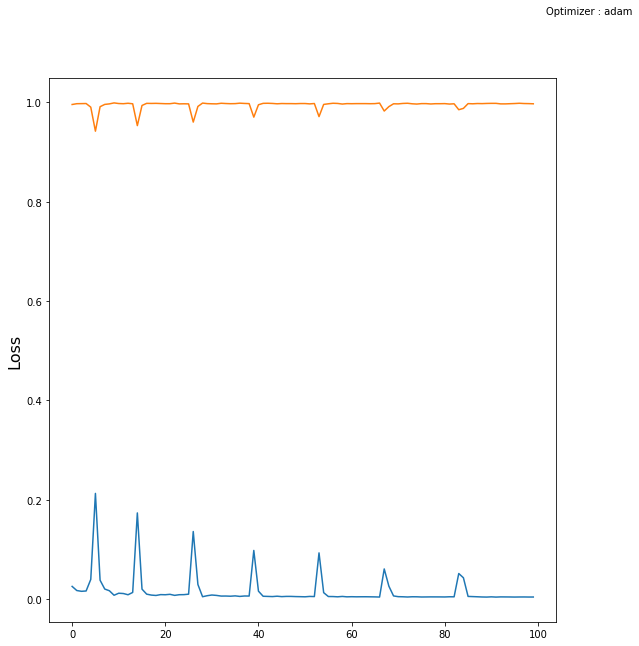

In [19]:
import matplotlib.pyplot as plt

x=hist1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.show()

# miniGoogleNet

In [20]:
def inceptionblock():
    
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Convolution2D(32, 3, 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dense(units = Y_train.shape[1], activation = 'softmax'))
    
    return model


In [21]:
model = inceptionblock()
print(model.summary())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_5 (Dense)              (None, 1126)             

In [23]:
hist2 = model.fit(X_train, Y_train, batch_size=16, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
352/352 - 3s - loss: 5.4884e-05 - accuracy: 0.9924
Epoch 2/100
352/352 - 4s - loss: 4.0498e-05 - accuracy: 0.9931
Epoch 3/100
352/352 - 3s - loss: 9.2644e-05 - accuracy: 0.9870
Epoch 4/100
352/352 - 4s - loss: 2.1080e-04 - accuracy: 0.9652
Epoch 5/100
352/352 - 3s - loss: 8.3105e-05 - accuracy: 0.9845
Epoch 6/100
352/352 - 3s - loss: 3.3706e-05 - accuracy: 0.9936
Epoch 7/100
352/352 - 3s - loss: 2.0604e-05 - accuracy: 0.9968
Epoch 8/100
352/352 - 4s - loss: 1.8381e-05 - accuracy: 0.9972
Epoch 9/100
352/352 - 4s - loss: 1.7083e-05 - accuracy: 0.9964
Epoch 10/100
352/352 - 3s - loss: 1.6076e-05 - accuracy: 0.9970
Epoch 11/100
352/352 - 3s - loss: 2.8506e-04 - accuracy: 0.9488
Epoch 12/100
352/352 - 3s - loss: 7.1626e-05 - accuracy: 0.9874
Epoch 13/100
352/352 - 3s - loss: 1.3730e-05 - accuracy: 0.9980
Epoch 14/100
352/352 - 3s - loss: 1.4858e-05 - accuracy: 0.9966
Epoch 15/100
352/352 - 4s - loss: 1.2316e-05 - accuracy: 0.9973
Epoch 16/100
352/352 - 3s - loss: 1.2326e-05 - ac

In [43]:
val3 = hist2.history['accuracy'][9]

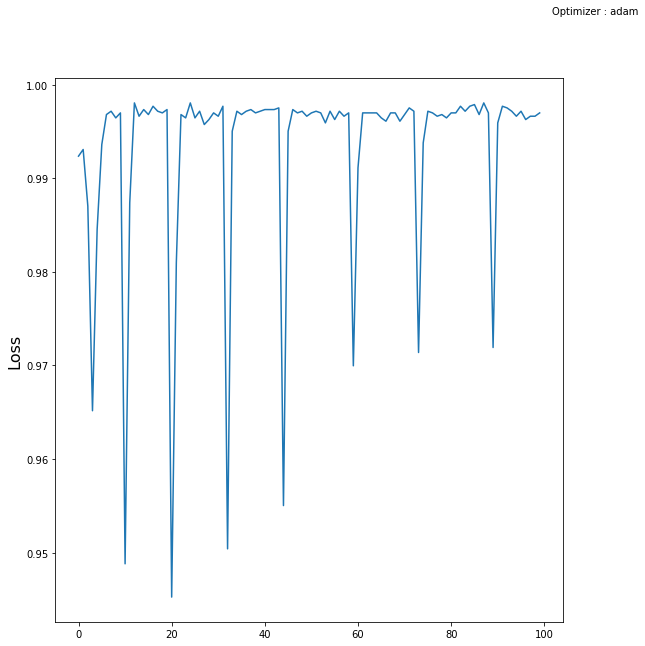

In [65]:
import matplotlib.pyplot as plt

x=hist2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
#plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.show()

# miniAlexNet

In [66]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = Y_train.shape[1], activation = 'softmax'))


In [67]:
print(model.summary())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 1, 16)          4624      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16)              

In [29]:
hist3 = model.fit(X_train, Y_train, batch_size=16, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
352/352 - 4s - loss: 7.9634e-06 - accuracy: 0.9968
Epoch 2/100
352/352 - 4s - loss: 8.4290e-06 - accuracy: 0.9972
Epoch 3/100
352/352 - 4s - loss: 8.3515e-06 - accuracy: 0.9964
Epoch 4/100
352/352 - 3s - loss: 7.9967e-06 - accuracy: 0.9982
Epoch 5/100
352/352 - 3s - loss: 8.3857e-06 - accuracy: 0.9968
Epoch 6/100
352/352 - 3s - loss: 8.1131e-06 - accuracy: 0.9963
Epoch 7/100
352/352 - 3s - loss: 7.8434e-06 - accuracy: 0.9968
Epoch 8/100
352/352 - 3s - loss: 7.9787e-06 - accuracy: 0.9972
Epoch 9/100
352/352 - 3s - loss: 8.4426e-06 - accuracy: 0.9964
Epoch 10/100
352/352 - 4s - loss: 1.6333e-04 - accuracy: 0.9710
Epoch 11/100
352/352 - 4s - loss: 8.8054e-06 - accuracy: 0.9979
Epoch 12/100
352/352 - 3s - loss: 9.0041e-06 - accuracy: 0.9970
Epoch 13/100
352/352 - 3s - loss: 8.5166e-06 - accuracy: 0.9964
Epoch 14/100
352/352 - 3s - loss: 8.1352e-06 - accuracy: 0.9966
Epoch 15/100
352/352 - 3s - loss: 8.0643e-06 - accuracy: 0.9963
Epoch 16/100
352/352 - 4s - loss: 7.7437e-06 - ac

In [30]:
val4 = hist3.history['accuracy'][99]

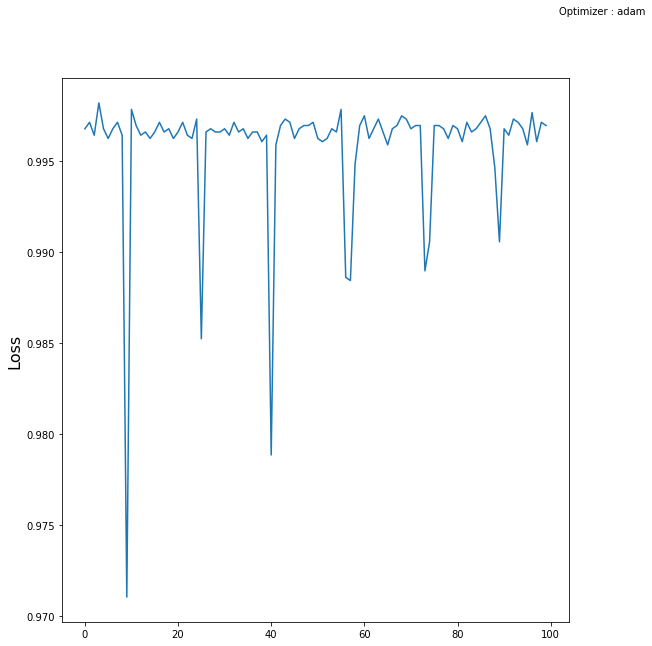

In [64]:
import matplotlib.pyplot as plt

x=hist3
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)

plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.show()

# CNN with 2 FullyConnected Layer 

In [34]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(filters = 4, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = Y_train.shape[1], activation = 'softmax'))


In [35]:
print(model.summary())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 16)          4624      
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 16)         

In [36]:
hist4 = model.fit(X_train, Y_train, batch_size=16, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
352/352 - 4s - loss: 0.0071
Epoch 2/100
352/352 - 4s - loss: 0.0071
Epoch 3/100
352/352 - 4s - loss: 0.0071
Epoch 4/100
352/352 - 4s - loss: 0.0071
Epoch 5/100
352/352 - 4s - loss: 0.0071
Epoch 6/100
352/352 - 4s - loss: 0.0071
Epoch 7/100
352/352 - 4s - loss: 0.0071
Epoch 8/100
352/352 - 4s - loss: 0.0071
Epoch 9/100
352/352 - 4s - loss: 0.0071
Epoch 10/100
352/352 - 4s - loss: 0.0071
Epoch 11/100
352/352 - 4s - loss: 0.0071
Epoch 12/100
352/352 - 4s - loss: 0.0071
Epoch 13/100
352/352 - 4s - loss: 0.0071
Epoch 14/100
352/352 - 4s - loss: 0.0071
Epoch 15/100
352/352 - 4s - loss: 0.0071
Epoch 16/100
352/352 - 4s - loss: 0.0071
Epoch 17/100
352/352 - 4s - loss: 0.0071
Epoch 18/100
352/352 - 4s - loss: 0.0071
Epoch 19/100
352/352 - 4s - loss: 0.0071
Epoch 20/100
352/352 - 4s - loss: 0.0071
Epoch 21/100
352/352 - 4s - loss: 0.0071
Epoch 22/100
352/352 - 4s - loss: 0.0071
Epoch 23/100
352/352 - 4s - loss: 0.0071
Epoch 24/100
352/352 - 4s - loss: 0.0071
Epoch 25/100
352/352 - 4s

In [40]:
val5 = 1 - hist4.history['loss'][99]

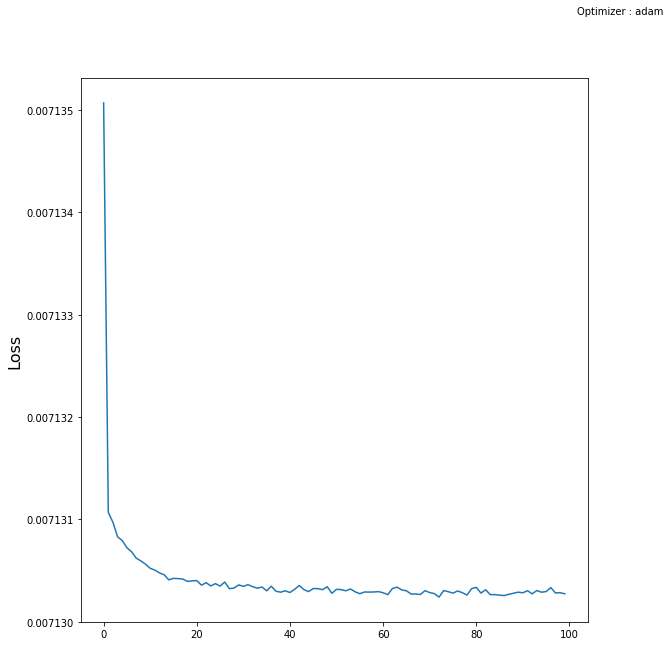

In [41]:
import matplotlib.pyplot as plt

x=hist4
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.show()

# Comparison

In [45]:
score = [val1,val2,val3,val4,val5]

In [46]:
#make variabel for save the result and to show it
classifier = ('Autoencoder CNN','miniVGG','miniGoogleNet','miniAlexNet','CNN + 2 FullyConnected')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[0.9928679810836911, 0.9983999729156494, 0.9969778060913086, 0.9969778060913086, 0.9928697273135185]


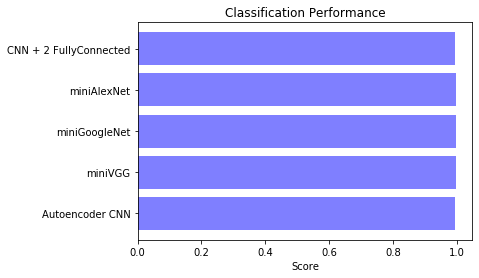

In [49]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [50]:
import numpy as np
import pandas as pd
from Recipe import *
import os
import cv2

In [51]:
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json

In [52]:
import ast

In [53]:
recipe_list = []

In [54]:
recipe_list.clear()
dataset = pd.read_csv('Dataset/core-data_recipe.csv',nrows=1000)
for i in range(len(dataset)):
    r_id = dataset._get_value(i, 'recipe_id')
    r_name = dataset._get_value(i, 'recipe_name')
    ingredients = dataset._get_value(i, 'ingredients')
    nutritions = dataset._get_value(i, 'nutritions')
    cooking = ast.literal_eval(dataset._get_value(i, 'cooking_directions')).get('directions')
    r_name = r_name.strip().lower()
    obj = Recipe()
    obj.setRecipeID(r_id)
    obj.setName(r_name)
    obj.setIngredients(ingredients)
    obj.setNutritions(nutritions)
    obj.setCooking(cooking)
    recipe_list.append(obj)
indian = np.load('index.txt.npy',allow_pickle=True)
for i in range(len(indian)):
    recipe_list.append(indian[i])
obj = recipe_list[len(recipe_list)-1]
print(obj.getName())

indian chai hot chocolate


In [55]:
global classifier
if os.path.exists('model/1model.json'):
    with open('model/1model.json', "r") as json_file:
        loaded_model_json = json_file.read()
        classifier = model_from_json(loaded_model_json)
    classifier.load_weights("model/1model_weights.h5")
    #classifier._make_predict_function()  
    print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_2 (Dense)              (None, 1126)             

In [56]:
image = cv2.imread('testImages/1.jpg')

In [57]:
img = cv2.resize(image, (64,64))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,64,64,3)
img = np.asarray(im2arr)
img = img.astype('float32')
img = img/255
preds = classifier.predict(img)

In [58]:
predict = np.argmax(preds)
if predict > 0:
    predict = predict - 1
print(predict)

1122


In [59]:
obj = recipe_list[predict]

In [60]:
obj.getName()

'indian vegetable rice'

In [61]:
obj.getIngredients()

'vegetable oil^onion^ground cumin^Basmati rice^water^salt^garam masala^frozen mixed vegetables'

In [62]:
obj.getCooking()

'Prep\n10 m\nCook\n40 m\nReady In\n50 m\nIn a large pan heat oil over medium heat and saute onions and cumin until onions are tender, but not browned. Rinse the rise several times and drain well. Add the rice to the pan with the onions and pour in the 2 cups of water. Stir in salt, garam masala and vegetables. Cover the pan and increase the heat to high.\nBring the mixture to a boil and then reduce the heat to low, keeping the rice covered at all times. After cooking for about 10 minutes, gently stir the rice to distribute the spices evenly. Cook 25 to 30 minutes, or until all of the water has evaporated and the rice is tender.'

In [63]:
obj.getNutritions()

"{u'niacin': {u'hasCompleteData': False, u'name': u'Niacin Equivalents', u'amount': 1.377288, u'percentDailyValue': u'11', u'displayValue': u'1', u'unit': u'mg'}, u'sugars': {u'hasCompleteData': False, u'name': u'Sugars', u'amount': 3.643998, u'percentDailyValue': u'0', u'displayValue': u'3.6', u'unit': u'g'}, u'sodium': {u'hasCompleteData': False, u'name': u'Sodium', u'amount': 904.5907, u'percentDailyValue': u'36', u'displayValue': u'905', u'unit': u'mg'}, u'carbohydrates': {u'hasCompleteData': False, u'name': u'Carbohydrates', u'amount': 87.06129, u'percentDailyValue': u'28', u'displayValue': u'87.1', u'unit': u'g'}, u'vitaminB6': {u'hasCompleteData': False, u'name': u'Vitamin B6', u'amount': 0.1287863, u'percentDailyValue': u'8', u'displayValue': u'< 1', u'unit': u'mg'}, u'calories': {u'hasCompleteData': False, u'name': u'Calories', u'amount': 514.7228, u'percentDailyValue': u'26', u'displayValue': u'515', u'unit': u'kcal'}, u'thiamin': {u'hasCompleteData': False, u'name': u'Thiami